## Importing Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import chi2
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')

## Stock Data

In [2]:
stock=yf.download('GRASIM.NS',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False).reset_index()
stock.columns = stock.columns.droplevel(1)  
stock=stock.drop('Date',axis=1)
stock.columns.name = None  
stock

,Close,High,Low,Open,Volume
0,750.938721,759.922997,739.672010,749.821757,2143086
1,754.872437,757.494834,742.537268,752.735641,1746130
2,769.004395,771.626792,749.384709,757.591926,2418947
3,768.907288,771.626818,758.563216,769.004420,1706604
4,762.642578,780.902468,759.631591,771.286891,2363692
...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682


## USD INR Exchange Rate

In [3]:
er=pd.DataFrame(pd.read_csv('USD_INR.csv')['Price']).iloc[:1238,:]
er=er.rename({'Price':'Exchange Rate'},axis=1)
er

,Exchange Rate
0,88.003
1,87.991
2,87.810
3,88.782
4,88.665
...,...
1233,72.915
1234,72.970
1235,72.985
1236,72.970


## Interest Rate (Repo Rate)

In [4]:
ir=pd.DataFrame(pd.read_csv('Interest Rate.csv')['Interest Rate (%)']).iloc[:1238,:]
ir

,Interest Rate (%)
0,5.5
1,5.5
2,5.5
3,5.5
4,5.5
...,...
1233,4.0
1234,4.0
1235,4.0
1236,4.0


## Crude Oil Prices

In [5]:
oil=pd.DataFrame(pd.read_csv('Oil Price.csv')[['Price','Vol.']]).iloc[:1238,:]
oil=oil.rename({'Price':'Oil Price','Vol.':'Oil Vol'},axis=1)
oil['Oil Vol']=oil['Oil Vol'].apply(lambda x: str(x).replace('K',''))
oil['Oil Vol']=oil['Oil Vol'].apply(lambda x: float(x)*1000)
oil

,Oil Price,Oil Vol
0,56.95,5520.0
1,57.54,108750.0
2,57.46,203870.0
3,58.27,224920.0
4,58.27,232450.0
...,...,...
1233,56.70,170650.0
1234,56.07,147930.0
1235,55.54,173150.0
1236,54.62,182830.0


## FPI Data

In [6]:
fpi=pd.read_csv("FPI Data.csv")
fpi

,FPI Data
0,2.453022e+07
1,1.312243e+09
2,6.617675e+07
3,1.031920e+11
4,1.131740e+11
...,...
1233,2.793077e+09
1234,2.793077e+09
1235,2.793077e+09
1236,2.793077e+09


## Parent Indices Data

**NIFTY 50**

In [7]:
nifty50=yf.download('^NSEI',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty50.columns = nifty50.columns.droplevel(1)  
nifty50=nifty50.drop('Date',axis=1)
nifty50.columns.name = None   
nifty50=nifty50.rename(columns={'Close':'NIFTY50 Close','Volume':'NIFTY50 Vol'})
nifty50

,NIFTY50 Close,NIFTY50 Vol
0,11873.049805,541400
1,11896.799805,453600
2,11937.650391,623700
3,11896.450195,544900
4,11930.349609,502300
...,...,...
1232,25227.349609,234300
1233,25145.500000,292100
1234,25323.550781,289900
1235,25585.300781,372800


**NIFTY Commodities**

In [8]:
nifty_commodities=yf.download('^CNXCMDT',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty_commodities.columns = nifty_commodities.columns.droplevel(1)  
nifty_commodities=nifty_commodities.drop('Date',axis=1)
nifty_commodities.columns.name = None
nifty_commodities=nifty_commodities.rename(columns={'Close':'NIFTYCMDT Close','Volume':'NIFTYCMDT Vol'})
nifty_commodities

,NIFTYCMDT Close,NIFTYCMDT Vol
0,3186.300049,2402300
1,3170.350098,1930200
2,3204.949951,2849600
3,3225.500000,2414300
4,3222.750000,2256200
...,...,...
1217,9116.599609,0
1218,9050.650391,0
1219,9142.700195,0
1220,9211.349609,0


**NIFTY Infrastructure**

In [9]:
nifty_infrastructure=yf.download('^CNXINFRA',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty_infrastructure.columns = nifty_infrastructure.columns.droplevel(1)  
nifty_infrastructure=nifty_infrastructure.drop('Date',axis=1)
nifty_infrastructure.columns.name = None  
nifty_infrastructure=nifty_infrastructure.rename(columns={'Close':'NIFTYINFRA Close','Volume':'NIFTYINFRA Vol'}) 
nifty_infrastructure

,NIFTYINFRA Close,NIFTYINFRA Vol
0,3090.750000,2397700
1,3093.149902,2342600
2,3122.050049,2964600
3,3145.100098,3196700
4,3152.399902,3180700
...,...,...
1217,9174.500000,1677000
1218,9134.500000,1744800
1219,9227.099609,1995000
1220,9305.349609,1795900


## Combining, Cleaning & Feature Engineering

In [47]:
final=pd.concat([stock,nifty50,nifty_infrastructure,nifty_commodities,er,ir,oil,fpi],axis=1)
final

,Close,High,Low,Open,Volume,NIFTY50 Close,NIFTY50 Vol,NIFTYINFRA Close,NIFTYINFRA Vol,NIFTYCMDT Close,NIFTYCMDT Vol,Exchange Rate,Interest Rate (%),Oil Price,Oil Vol,FPI Data
0,750.938721,759.922997,739.672010,749.821757,2143086,11873.049805,541400.0,3090.750000,2397700.0,3186.300049,2402300.0,88.003,5.5,56.95,5520.0,2.453022e+07
1,754.872437,757.494834,742.537268,752.735641,1746130,11896.799805,453600.0,3093.149902,2342600.0,3170.350098,1930200.0,87.991,5.5,57.54,108750.0,1.312243e+09
2,769.004395,771.626792,749.384709,757.591926,2418947,11937.650391,623700.0,3122.050049,2964600.0,3204.949951,2849600.0,87.810,5.5,57.46,203870.0,6.617675e+07
3,768.907288,771.626818,758.563216,769.004420,1706604,11896.450195,544900.0,3145.100098,3196700.0,3225.500000,2414300.0,88.782,5.5,58.27,224920.0,1.031920e+11
4,762.642578,780.902468,759.631591,771.286891,2363692,11930.349609,502300.0,3152.399902,3180700.0,3222.750000,2256200.0,88.665,5.5,58.27,232450.0,1.131740e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622,25145.500000,292100.0,NaN,NaN,NaN,NaN,72.915,4.0,56.70,170650.0,2.793077e+09
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183,25323.550781,289900.0,NaN,NaN,NaN,NaN,72.970,4.0,56.07,147930.0,2.793077e+09
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912,25585.300781,372800.0,NaN,NaN,NaN,NaN,72.985,4.0,55.54,173150.0,2.793077e+09
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682,25709.849609,422100.0,NaN,NaN,NaN,NaN,72.970,4.0,54.62,182830.0,2.793077e+09


In [48]:
final['EMA_20-EMA_50'] = final['Close'].ewm(span=20, adjust=False).mean()-final['Close'].ewm(span=50, adjust=False).mean()
final['Gained']=(final['Close']-final['Close'].shift(1)).where(final['Close']>final['Close'].shift(1), 0)
final['Lost']=(abs(final['Close']-final['Close'].shift(1))).where(final['Close']<final['Close'].shift(1), 0)
final['RSI']=(100*final['Gained'].rolling(14).sum()/final['Lost'].rolling(14).sum())/(1+final['Gained'].rolling(14).sum()/final['Lost'].rolling(14).sum())
final['Log Returns']=np.log(final['Close']/final['Close'].shift(1))
final['H-L']=final['High']-final['Low']
final['C-O']=final['Close']-final['Open']
final['VR1']=final['Volume']/final['NIFTY50 Vol']
final['VR2']=final['Volume']/final['NIFTYINFRA Vol']
final['VR3']=final['Volume']/final['NIFTYCMDT Vol']
final['Stock Change']=final['Close']-final['Close'].shift(1)
final['NIFTY50 Change']=final['NIFTY50 Close']-final['NIFTY50 Close'].shift(1)
final['NIFTYINFRA Change']=final['NIFTYINFRA Close']-final['NIFTYINFRA Close'].shift(1)
final['NIFTYCMDT Change']=final['NIFTYCMDT Close']-final['NIFTYCMDT Close'].shift(1)
final['ER/IR']=final['Exchange Rate']/final['Interest Rate (%)']

In [49]:
final['Target']=final['Log Returns']
final.fillna(method='ffill',inplace=True)
final.reset_index(inplace=True)

In [50]:
final=final.drop(['index','Gained','Lost'],axis=1)
final.dropna(inplace=True)
final

,Close,High,Low,Open,Volume,NIFTY50 Close,NIFTY50 Vol,NIFTYINFRA Close,NIFTYINFRA Vol,NIFTYCMDT Close,...,C-O,VR1,VR2,VR3,Stock Change,NIFTY50 Change,NIFTYINFRA Change,NIFTYCMDT Change,ER/IR,Target
13,781.291016,787.118606,764.876523,764.876523,2985097,12120.299805,632500.0,3183.050049,3163800.0,3306.850098,...,16.414493,4.719521,0.943516,0.932901,20.688110,211.799805,62.900146,95.250000,16.152909,0.026836
14,771.529602,785.758732,768.761506,785.758732,1506722,12263.549805,576800.0,3189.850098,2667100.0,3318.199951,...,-14.229130,2.612209,0.564929,0.595707,-9.761414,143.250000,6.800049,11.349854,16.128000,-0.012573
15,769.392883,785.078942,766.527654,774.103570,2196951,12461.049805,553400.0,3243.649902,2675000.0,3368.399902,...,-4.710686,3.969915,0.821290,1.004229,-2.136719,197.500000,53.799805,50.199951,16.123091,-0.002773
16,766.818970,793.043303,758.611694,776.046017,2914387,12631.099609,847500.0,3305.750000,3689500.0,3386.350098,...,-9.227047,3.438805,0.789914,1.059430,-2.573914,170.049805,62.100098,17.950195,16.139636,-0.003351
17,780.028381,785.370369,767.304683,769.247273,2520351,12749.150391,880500.0,3338.850098,3684100.0,3437.750000,...,10.781108,2.862409,0.684116,0.716172,13.209412,118.050781,33.100098,51.399902,16.141273,0.017080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622,25145.500000,292100.0,9338.549805,3282500.0,9194.299805,...,6.899902,0.960705,0.096430,inf,-13.000000,-81.849609,33.200195,-17.049805,18.228750,-0.004635
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183,25323.550781,289900.0,9338.549805,3282500.0,9194.299805,...,-22.199951,1.090662,0.096430,inf,-22.199951,178.050781,33.200195,-17.049805,18.242500,-0.007966
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912,25585.300781,372800.0,9338.549805,3282500.0,9194.299805,...,36.800049,1.233670,0.096430,inf,41.000000,261.750000,33.200195,-17.049805,18.246250,0.014662
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682,25709.849609,422100.0,9338.549805,3282500.0,9194.299805,...,34.100098,1.226444,0.096430,inf,43.000000,124.548828,33.200195,-17.049805,18.242500,0.015150


## Multicollinearity Check

**Correlation Matrix**

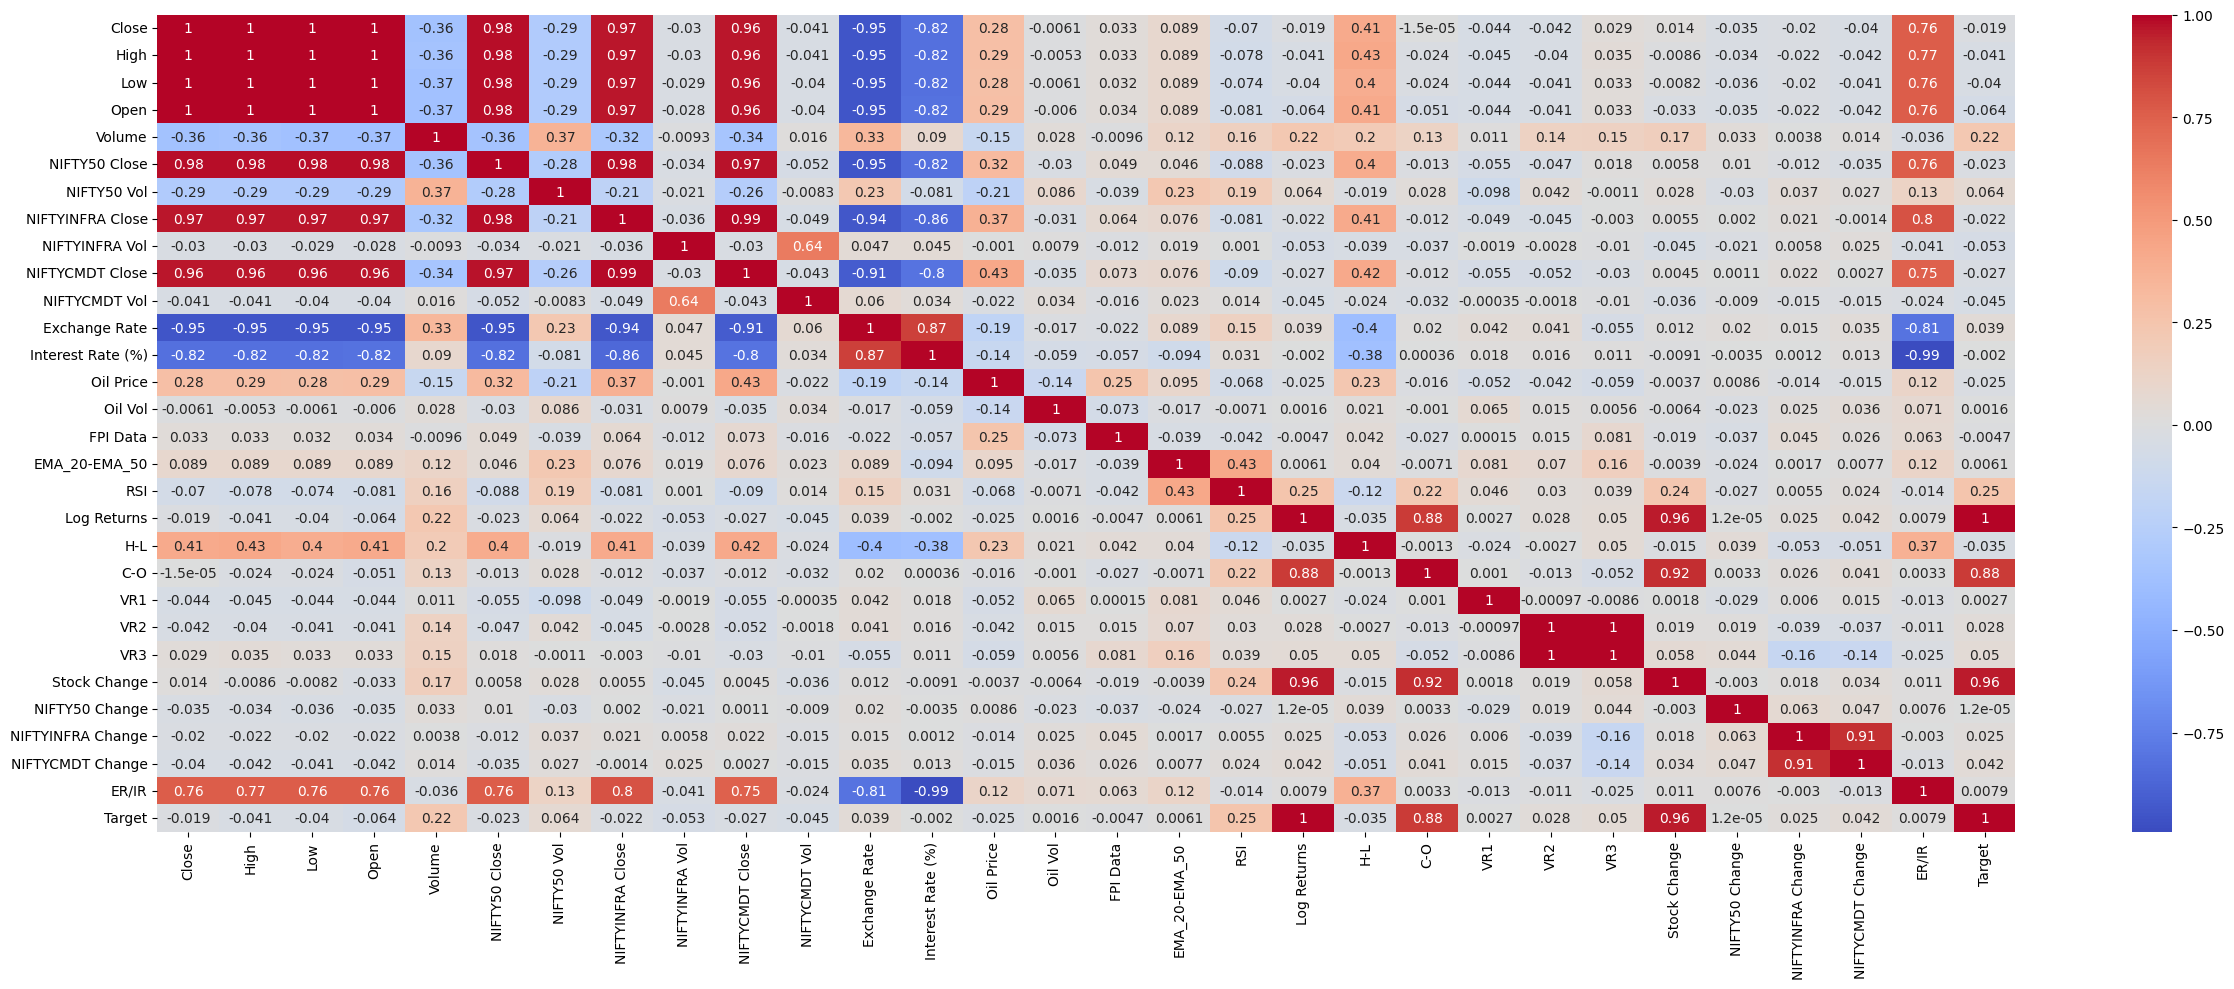

In [14]:
corr = final.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

**Variance Inflation Factor**

In [51]:
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final.fillna(method='ffill',inplace=True)
final=final.iloc[101:,:] # Initial 100 NA values for EMA_100 

In [16]:
vif_data = pd.DataFrame()
vif_data["feature"] = final.columns
vif_data["VIF"] = [variance_inflation_factor(final.values, i) for i in range(final.shape[1])]
vif_data

,feature,VIF
0,Close,9.007199e+15
1,High,3.899220e+13
2,Low,2.213071e+13
3,Open,1.098439e+14
4,Volume,7.376448e+00
5,NIFTY50 Close,8.649094e+01
6,NIFTY50 Vol,2.012498e+00
7,NIFTYINFRA Close,1.594556e+02
8,NIFTYINFRA Vol,1.714478e+00
9,NIFTYCMDT Close,9.702100e+01


## Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
X=final.drop('Target',axis=1)
y=final['Target']
split_index=int(0.8*len(X))
X_train=X[:split_index]
y_train=y[:split_index]
X_test=X[split_index:]
y_test=y[split_index:]

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
pca=PCA(n_components=0.95)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

## Step 1: ARMAX on log returns to capture patterns in mean

## *Stationarity Check*

In [21]:
sts.adfuller(final['Target'])

(np.float64(-18.099864716187287),
 np.float64(2.5554999018466404e-30),
 2,
 1121,
 {'1%': np.float64(-3.436196866494929),
  '5%': np.float64(-2.864121720649023),
  '10%': np.float64(-2.568144581443706)},
 np.float64(-6157.483439655099))

**Target is stationary**

## *Autocorrelation Check (For Seasonality & Order)*

**ACF**

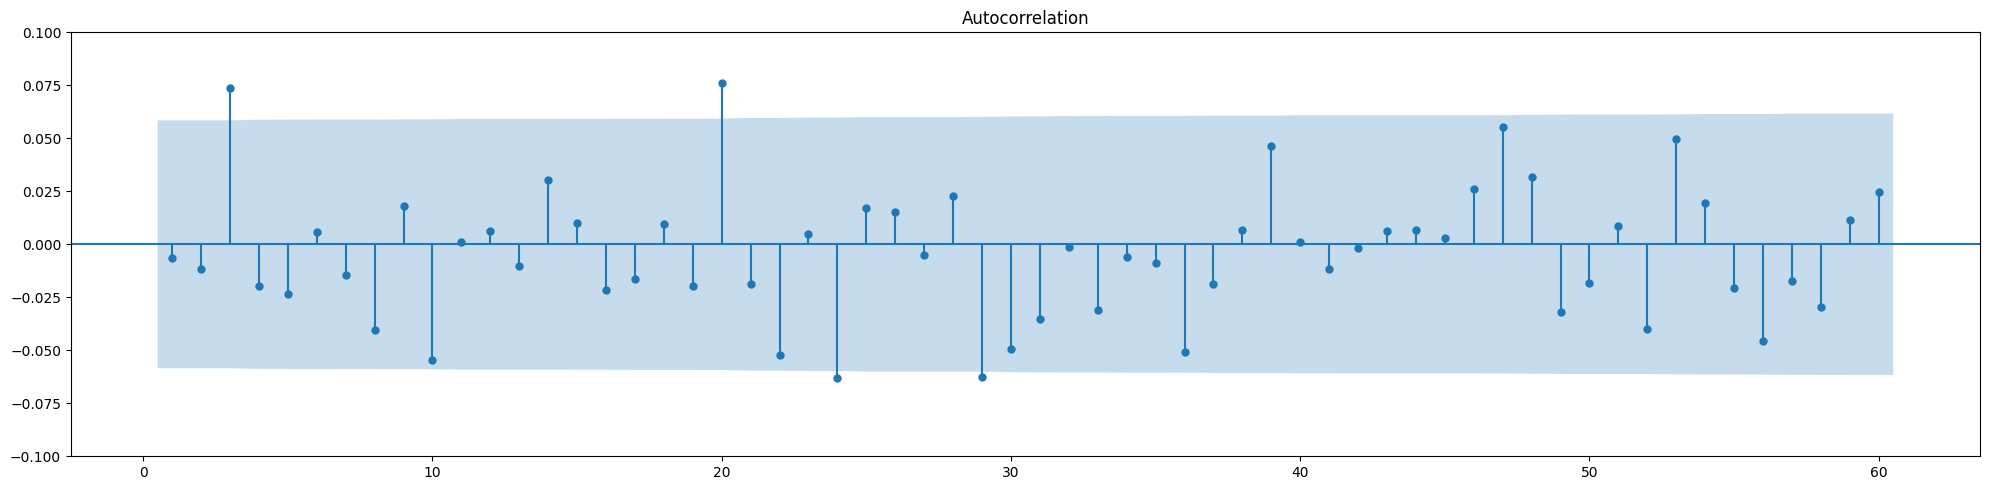

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sgt.plot_acf(final['Target'], lags=60, zero=False, ax=ax)
plt.ylim(top=0.1,bottom=-0.1)
plt.tight_layout()
plt.show()

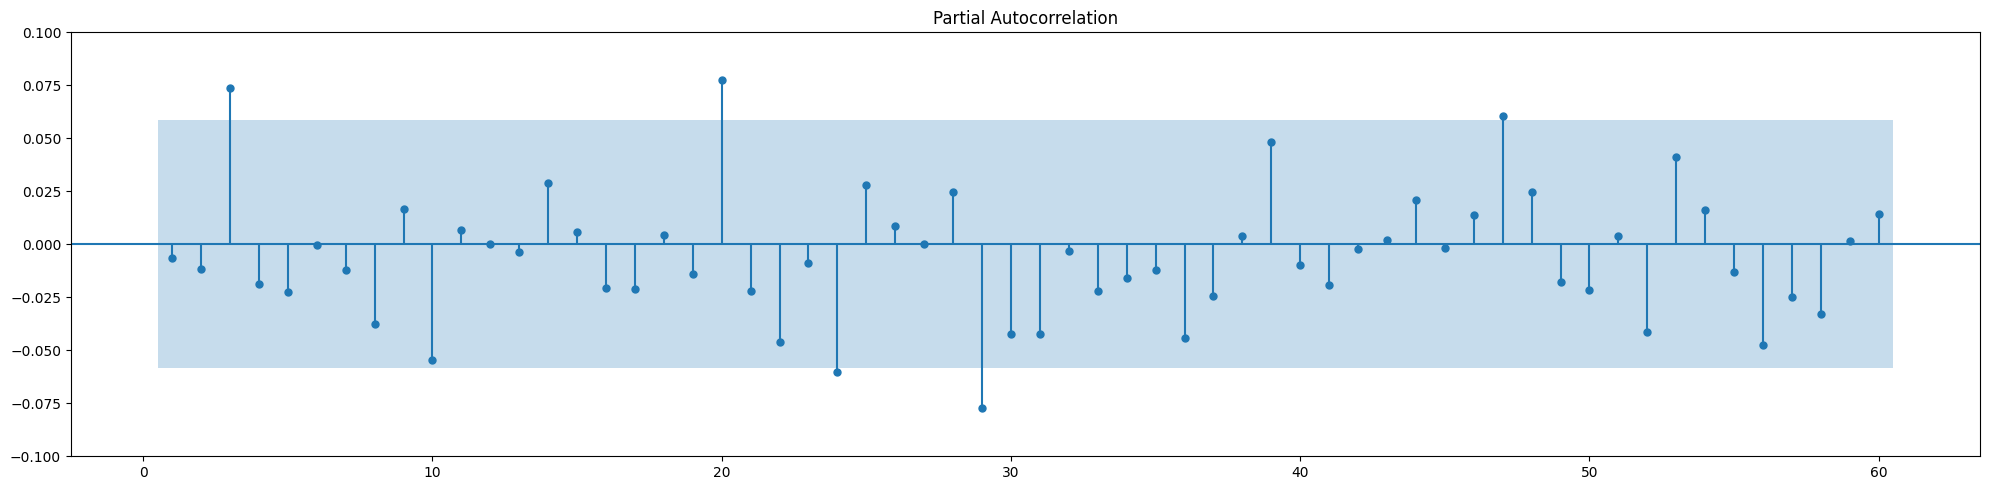

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
sgt.plot_pacf(final['Target'], lags=60, zero=False, ax=ax,method='ols')
plt.ylim(top=0.1,bottom=-0.1)
plt.tight_layout()
plt.show()

**No seasonality and fit ARMAX till order=3,3**

## *ARMAX Models*

In [24]:
armax_1_1=ARIMA(y_test,exog=X_test,order=(1,0,1))
armax_1_2=ARIMA(y_test,exog=X_test,order=(1,0,2))
armax_1_3=ARIMA(y_test,exog=X_test,order=(1,0,3))
armax_2_1=ARIMA(y_test,exog=X_test,order=(2,0,1))
armax_2_2=ARIMA(y_test,exog=X_test,order=(2,0,2))
armax_2_3=ARIMA(y_test,exog=X_test,order=(2,0,3))
armax_3_1=ARIMA(y_test,exog=X_test,order=(3,0,1))
armax_3_2=ARIMA(y_test,exog=X_test,order=(3,0,2))
armax_3_3=ARIMA(y_test,exog=X_test,order=(3,0,3))

In [25]:
result1=armax_1_1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1107.023
Date:                Tue, 28 Oct 2025   AIC                          -2178.047
Time:                        19:14:00   BIC                          -2116.557
Sample:                             0   HQIC                         -2153.229
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.828      0.000      -0.074      -0.044
x1             0.0088      0.001      8.146      0.000       0.007       0.011
x2             0.0184      0.002     11.917      0.000       0.015       0.021
x3            -0.0044      0.000    -10.148      0.000      -0.005      -0.004
x4            -0.0114      0.001     -8.184      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.849      0.000      -0.126      -0.076
x6             0.1010      0.013      7.937      0.000       0.076       0.126
x7             0.0066      0.001      5.457      0.000       0.004       0.009
x8             0.0129      0.002      8.059      0.000       0.010       0.016
x9             0.0078      0.001      7.332      0.000       0.006       0.010
x10            0.0209      0.003      7.965      0.000       0.016       0.026
x11           -0.0305      0.004     -7.841      0.000      -0.038      -0.023
x12            0.0005      0.000      1.402      0.161      -0.000       0.001
x13            0.0015      0.000      3.551      0.000       0.001       0.002
x14           -0.0185      0.002     -7.454      0.000      -0.023      -0.014
ar.L1          0.4990      0.304      1.644      0.100      -0.096       1.094
ma.L1         -0.3035      0.335     -0.907      0.365      -0.960       0.353
sigma2      3.099e-06   3.06e-07     10.139      0.000     2.5e-06     3.7e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               210.56
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.87
Prob(H) (two-sided):                  0.11   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
result2=armax_1_2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(1, 0, 2)   Log Likelihood                1107.946
Date:                Tue, 28 Oct 2025   AIC                          -2177.891
Time:                        19:14:01   BIC                          -2112.986
Sample:                             0   HQIC                         -2151.695
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.737      0.000      -0.074      -0.044
x1             0.0088      0.001      8.006      0.000       0.007       0.011
x2             0.0184      0.002     11.698      0.000       0.015       0.021
x3            -0.0044      0.000    -10.033      0.000      -0.005      -0.004
x4            -0.0114      0.001     -8.139      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.775      0.000      -0.126      -0.076
x6             0.1010      0.013      7.825      0.000       0.076       0.126
x7             0.0066      0.001      5.429      0.000       0.004       0.009
x8             0.0129      0.002      7.873      0.000       0.010       0.016
x9             0.0078      0.001      7.311      0.000       0.006       0.010
x10            0.0209      0.003      7.774      0.000       0.016       0.026
x11           -0.0305      0.004     -7.653      0.000      -0.038      -0.023
x12            0.0006      0.000      1.495      0.135      -0.000       0.001
x13            0.0015      0.000      3.499      0.000       0.001       0.002
x14           -0.0185      0.003     -7.274      0.000      -0.024      -0.014
ar.L1          0.0388      0.490      0.079      0.937      -0.922       0.999
ma.L1          0.1471      0.482      0.305      0.760      -0.798       1.092
ma.L2          0.1566      0.091      1.729      0.084      -0.021       0.334
sigma2      3.059e-06   3.02e-07     10.123      0.000    2.47e-06    3.65e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               159.69
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.79
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
result3=armax_1_3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(1, 0, 3)   Log Likelihood                1107.734
Date:                Tue, 28 Oct 2025   AIC                          -2175.467
Time:                        19:14:01   BIC                          -2107.145
Sample:                             0   HQIC                         -2147.892
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.676      0.000      -0.074      -0.044
x1             0.0088      0.001      7.935      0.000       0.007       0.011
x2             0.0184      0.002     11.465      0.000       0.015       0.022
x3            -0.0044      0.000    -10.053      0.000      -0.005      -0.004
x4            -0.0114      0.001     -7.965      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.626      0.000      -0.127      -0.075
x6             0.1010      0.013      7.675      0.000       0.075       0.127
x7             0.0066      0.001      5.333      0.000       0.004       0.009
x8             0.0129      0.002      7.729      0.000       0.010       0.016
x9             0.0078      0.001      7.163      0.000       0.006       0.010
x10            0.0209      0.003      7.623      0.000       0.016       0.026
x11           -0.0305      0.004     -7.535      0.000      -0.038      -0.023
x12            0.0006      0.000      1.560      0.119      -0.000       0.001
x13            0.0015      0.000      3.605      0.000       0.001       0.002
x14           -0.0185      0.003     -7.166      0.000      -0.024      -0.013
ar.L1          0.5379      1.919      0.280      0.779      -3.224       4.300
ma.L1         -0.3581      1.900     -0.188      0.851      -4.083       3.366
ma.L2          0.0707      0.356      0.199      0.843      -0.627       0.768
ma.L3         -0.1264      0.291     -0.434      0.664      -0.697       0.444
sigma2      3.072e-06   3.14e-07      9.774      0.000    2.46e-06    3.69e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               138.49
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.73
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.53e+14. Standard errors may be unstable.
"""

In [28]:
result4=armax_2_1.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                1107.803
Date:                Tue, 28 Oct 2025   AIC                          -2177.605
Time:                        19:14:02   BIC                          -2112.699
Sample:                             0   HQIC                         -2151.409
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.712      0.000      -0.074      -0.044
x1             0.0089      0.001      7.990      0.000       0.007       0.011
x2             0.0184      0.002     11.697      0.000       0.015       0.021
x3            -0.0044      0.000    -10.008      0.000      -0.005      -0.004
x4            -0.0114      0.001     -8.126      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.750      0.000      -0.127      -0.075
x6             0.1010      0.013      7.816      0.000       0.076       0.126
x7             0.0066      0.001      5.381      0.000       0.004       0.009
x8             0.0129      0.002      7.890      0.000       0.010       0.016
x9             0.0078      0.001      7.251      0.000       0.006       0.010
x10            0.0209      0.003      7.788      0.000       0.016       0.026
x11           -0.0305      0.004     -7.677      0.000      -0.038      -0.023
x12            0.0006      0.000      1.488      0.137      -0.000       0.001
x13            0.0015      0.000      3.466      0.001       0.001       0.002
x14           -0.0185      0.003     -7.291      0.000      -0.023      -0.014
ar.L1         -0.3073      0.526     -0.585      0.559      -1.337       0.723
ar.L2          0.2294      0.080      2.886      0.004       0.074       0.385
ma.L1          0.5030      0.532      0.945      0.345      -0.540       1.546
sigma2       3.08e-06   3.03e-07     10.164      0.000    2.49e-06    3.67e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               133.92
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.71
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
result5=armax_2_2.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(2, 0, 2)   Log Likelihood                1107.991
Date:                Tue, 28 Oct 2025   AIC                          -2175.982
Time:                        19:14:03   BIC                          -2107.660
Sample:                             0   HQIC                         -2148.407
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.716      0.000      -0.074      -0.044
x1             0.0088      0.001      7.978      0.000       0.007       0.011
x2             0.0184      0.002     11.645      0.000       0.015       0.021
x3            -0.0044      0.000     -9.921      0.000      -0.005      -0.004
x4            -0.0114      0.001     -8.081      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.741      0.000      -0.127      -0.075
x6             0.1010      0.013      7.788      0.000       0.076       0.126
x7             0.0066      0.001      5.409      0.000       0.004       0.009
x8             0.0129      0.002      7.838      0.000       0.010       0.016
x9             0.0078      0.001      7.272      0.000       0.006       0.010
x10            0.0209      0.003      7.728      0.000       0.016       0.026
x11           -0.0305      0.004     -7.612      0.000      -0.038      -0.023
x12            0.0006      0.000      1.484      0.138      -0.000       0.001
x13            0.0015      0.000      3.427      0.001       0.001       0.002
x14           -0.0185      0.003     -7.241      0.000      -0.024      -0.014
ar.L1          0.1154      0.775      0.149      0.882      -1.404       1.635
ar.L2         -0.0785      0.542     -0.145      0.885      -1.142       0.985
ma.L1          0.0708      0.769      0.092      0.927      -1.437       1.579
ma.L2          0.2200      0.438      0.502      0.616      -0.639       1.079
sigma2      3.072e-06   3.05e-07     10.073      0.000    2.47e-06    3.67e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               164.05
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.80
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
result6=armax_2_3.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(2, 0, 3)   Log Likelihood                1107.367
Date:                Tue, 28 Oct 2025   AIC                          -2172.735
Time:                        19:14:03   BIC                          -2100.997
Sample:                             0   HQIC                         -2143.781
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.669      0.000      -0.074      -0.044
x1             0.0088      0.001      7.892      0.000       0.007       0.011
x2             0.0184      0.002     11.426      0.000       0.015       0.022
x3            -0.0044      0.000     -9.921      0.000      -0.005      -0.004
x4            -0.0114      0.001     -7.914      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.585      0.000      -0.127      -0.075
x6             0.1010      0.013      7.649      0.000       0.075       0.127
x7             0.0066      0.001      5.285      0.000       0.004       0.009
x8             0.0129      0.002      7.710      0.000       0.010       0.016
x9             0.0078      0.001      7.126      0.000       0.006       0.010
x10            0.0209      0.003      7.613      0.000       0.016       0.026
x11           -0.0304      0.004     -7.531      0.000      -0.038      -0.023
x12            0.0006      0.000      1.567      0.117      -0.000       0.001
x13            0.0015      0.000      3.562      0.000       0.001       0.002
x14           -0.0185      0.003     -7.159      0.000      -0.024      -0.013
ar.L1          0.6138      1.189      0.516      0.606      -1.717       2.945
ar.L2         -0.1353      0.501     -0.270      0.787      -1.118       0.847
ma.L1         -0.4351      1.168     -0.373      0.709      -2.724       1.854
ma.L2          0.1929      0.555      0.348      0.728      -0.894       1.280
ma.L3         -0.1152      0.211     -0.546      0.585      -0.529       0.298
sigma2       3.09e-06   3.15e-07      9.816      0.000    2.47e-06    3.71e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               138.44
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.72
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
result7=armax_3_1.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(3, 0, 1)   Log Likelihood                1107.884
Date:                Tue, 28 Oct 2025   AIC                          -2175.768
Time:                        19:14:04   BIC                          -2107.446
Sample:                             0   HQIC                         -2148.193
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.652      0.000      -0.074      -0.044
x1             0.0089      0.001      7.951      0.000       0.007       0.011
x2             0.0184      0.002     11.523      0.000       0.015       0.022
x3            -0.0044      0.000     -9.906      0.000      -0.005      -0.004
x4            -0.0114      0.001     -8.046      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.682      0.000      -0.127      -0.075
x6             0.1010      0.013      7.711      0.000       0.075       0.127
x7             0.0066      0.001      5.367      0.000       0.004       0.009
x8             0.0129      0.002      7.731      0.000       0.010       0.016
x9             0.0078      0.001      7.223      0.000       0.006       0.010
x10            0.0209      0.003      7.637      0.000       0.016       0.026
x11           -0.0305      0.004     -7.511      0.000      -0.038      -0.023
x12            0.0006      0.000      1.494      0.135      -0.000       0.001
x13            0.0015      0.000      3.480      0.001       0.001       0.002
x14           -0.0185      0.003     -7.144      0.000      -0.024      -0.013
ar.L1          0.1089      1.543      0.071      0.944      -2.915       3.133
ar.L2          0.1502      0.284      0.529      0.597      -0.407       0.707
ar.L3         -0.0513      0.207     -0.248      0.804      -0.457       0.354
ma.L1          0.0867      1.539      0.056      0.955      -2.930       3.103
sigma2      3.075e-06   3.04e-07     10.099      0.000    2.48e-06    3.67e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               142.63
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.74
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
result8=armax_3_2.fit()
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(3, 0, 2)   Log Likelihood                1099.600
Date:                Tue, 28 Oct 2025   AIC                          -2157.199
Time:                        19:14:05   BIC                          -2085.461
Sample:                             0   HQIC                         -2128.245
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.007     -8.193      0.000      -0.073      -0.045
x1             0.0088      0.001      8.466      0.000       0.007       0.011
x2             0.0184      0.002     12.021      0.000       0.015       0.021
x3            -0.0044      0.000    -10.550      0.000      -0.005      -0.004
x4            -0.0114      0.001     -8.179      0.000      -0.014      -0.009
x5            -0.1010      0.013     -7.901      0.000      -0.126      -0.076
x6             0.1010      0.013      8.002      0.000       0.076       0.126
x7             0.0066      0.001      5.446      0.000       0.004       0.009
x8             0.0129      0.002      8.174      0.000       0.010       0.016
x9             0.0078      0.001      7.300      0.000       0.006       0.010
x10            0.0209      0.003      8.037      0.000       0.016       0.026
x11           -0.0304      0.004     -7.986      0.000      -0.038      -0.023
x12            0.0005      0.000      1.610      0.107      -0.000       0.001
x13            0.0014      0.000      3.905      0.000       0.001       0.002
x14           -0.0185      0.002     -7.583      0.000      -0.023      -0.014
ar.L1       8.163e-07      0.039    2.1e-05      1.000      -0.076       0.076
ar.L2       6.055e-07      0.038   1.59e-05      1.000      -0.075       0.075
ar.L3       5.086e-09      0.068   7.46e-08      1.000      -0.134       0.134
ma.L1       8.163e-07      0.039    2.1e-05      1.000      -0.076       0.076
ma.L2       6.054e-07      0.038   1.59e-05      1.000      -0.075       0.075
sigma2      3.368e-06   3.52e-07      9.565      0.000    2.68e-06    4.06e-06
===================================================================================
Ljung-Box (L1) (Q):                  11.29   Jarque-Bera (JB):               141.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.67
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+17. Standard errors may be unstable.
"""

In [33]:
result9=armax_3_3.fit()
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Target   No. Observations:                  225
Model:                 ARIMA(3, 0, 3)   Log Likelihood                1109.528
Date:                Tue, 28 Oct 2025   AIC                          -2175.056
Time:                        19:14:06   BIC                          -2099.902
Sample:                             0   HQIC                         -2144.724
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0591      0.008     -7.577      0.000      -0.074      -0.044
x1             0.0088      0.001      7.772      0.000       0.007       0.011
x2             0.0184      0.002     11.061      0.000       0.015       0.022
x3            -0.0044      0.000    -10.138      0.000      -0.005      -0.004
x4            -0.0114      0.001     -7.644      0.000      -0.014      -0.008
x5            -0.1010      0.014     -7.338      0.000      -0.128      -0.074
x6             0.1010      0.014      7.387      0.000       0.074       0.128
x7             0.0066      0.001      5.153      0.000       0.004       0.009
x8             0.0129      0.002      7.494      0.000       0.010       0.016
x9             0.0078      0.001      6.917      0.000       0.006       0.010
x10            0.0209      0.003      7.356      0.000       0.015       0.026
x11           -0.0305      0.004     -7.326      0.000      -0.039      -0.022
x12            0.0006      0.000      1.539      0.124      -0.000       0.001
x13            0.0015      0.000      3.329      0.001       0.001       0.002
x14           -0.0185      0.003     -7.027      0.000      -0.024      -0.013
ar.L1          0.7832      0.959      0.817      0.414      -1.096       2.663
ar.L2         -0.4850      0.478     -1.015      0.310      -1.421       0.451
ar.L3          0.3770      0.346      1.088      0.277      -0.302       1.056
ma.L1         -0.6046      0.965     -0.627      0.531      -2.495       1.286
ma.L2          0.5159      0.457      1.129      0.259      -0.380       1.412
ma.L3         -0.4591      0.481     -0.954      0.340      -1.403       0.484
sigma2      3.019e-06   3.05e-07      9.892      0.000    2.42e-06    3.62e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               174.46
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.80
Prob(H) (two-sided):                  0.08   Kurtosis:                         7.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Model 9 has max Log Likelihood (best) but do LLR test to check if improvement is statistically significant (If p<0.05: statistically significant else, likely due to chance)

## *LLR Test*

In [34]:
def llr(result1,result2,df=1):
    L1=result1.llf
    L2=result2.llf
    LR=2*(L2-L1)
    p=chi2.sf(LR,df).round(3)
    return p

In [35]:
results=[result1,result2,result3,result4,result5,result6,result7,result8,result9]
for i in range(1,9):
    print(f'p-value (LLR Test) model {i} & model 9: ',llr(results[i-1],results[8]))

p-value (LLR Test) model 1 & model 9:  0.025
p-value (LLR Test) model 2 & model 9:  0.075
p-value (LLR Test) model 3 & model 9:  0.058
p-value (LLR Test) model 4 & model 9:  0.063
p-value (LLR Test) model 5 & model 9:  0.08
p-value (LLR Test) model 6 & model 9:  0.038
p-value (LLR Test) model 7 & model 9:  0.07
p-value (LLR Test) model 8 & model 9:  0.0


Model 9 significantly better than model 1,6,8 so discard them. So choose best via least AIC/BIC or simplest model

In [36]:
for i in range(9):
    print(f'AIC of model {i+1}: {results[i].aic}\tBIC of model {i+1}: {results[i].bic}')

AIC of model 1: -2178.046963998077	BIC of model 1: -2116.5571567583975
AIC of model 2: -2177.8914686276757	BIC of model 2: -2112.985560985792
AIC of model 3: -2175.4673225248753	BIC of model 3: -2107.145314480787
AIC of model 4: -2177.605026230538	BIC of model 4: -2112.699118588654
AIC of model 5: -2175.9822580723912	BIC of model 5: -2107.660250028303
AIC of model 6: -2172.734664192365	BIC of model 6: -2100.9965557460723
AIC of model 7: -2175.768032756245	BIC of model 7: -2107.4460247121565
AIC of model 8: -2157.199082149859	BIC of model 8: -2085.460973703566
AIC of model 9: -2175.0561011745085	BIC of model 9: -2099.9018923260114


**Model 1 has least AIC, BIC and is simplest, so check residuals for resemblance to white noise**

In [37]:
print(f'Mean and variance of residuals are {result1.resid.mean()} & {result1.resid.var()} respectively')

Mean and variance of residuals are 1.0461885353115162e-05 & 3.1328829640390056e-06 respectively


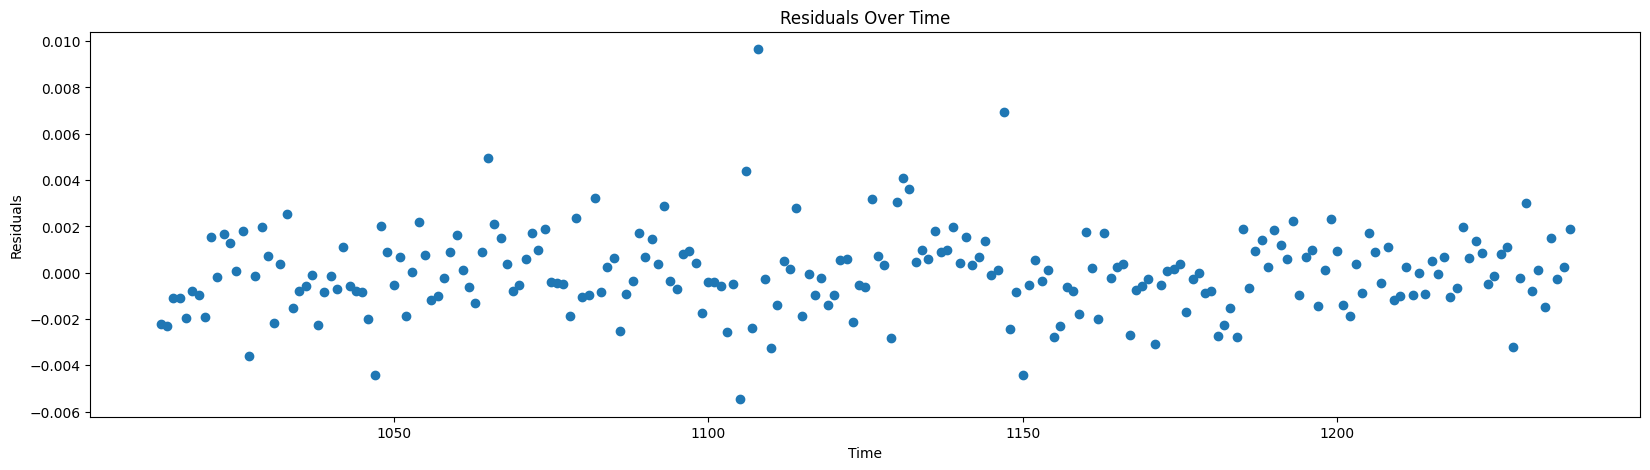

In [89]:
plt.figure(figsize=(20,5))
plt.scatter(result1.resid.index,result1.resid)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

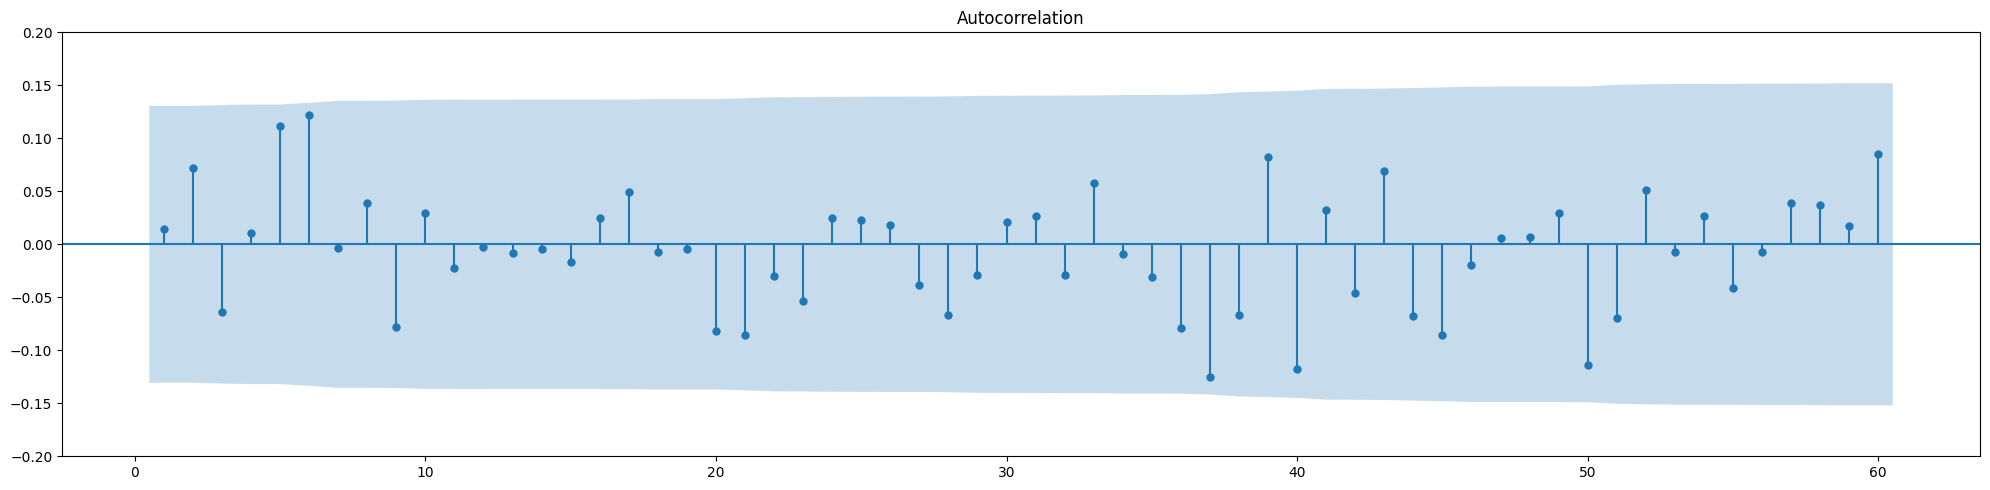

In [39]:
fig,ax=plt.subplots(figsize=(20,5))
sgt.plot_acf(result1.resid,lags=60,zero=False,ax=ax)
plt.ylim(top=0.2,bottom=-0.2)
plt.tight_layout()
plt.show()

**Residuals resemble to white noise. Thus final Model: ARMAX(1,1)**

## Step 2: GARCH on residuals to capture volatility clustering

## *Check ACF of squared residuals for order*

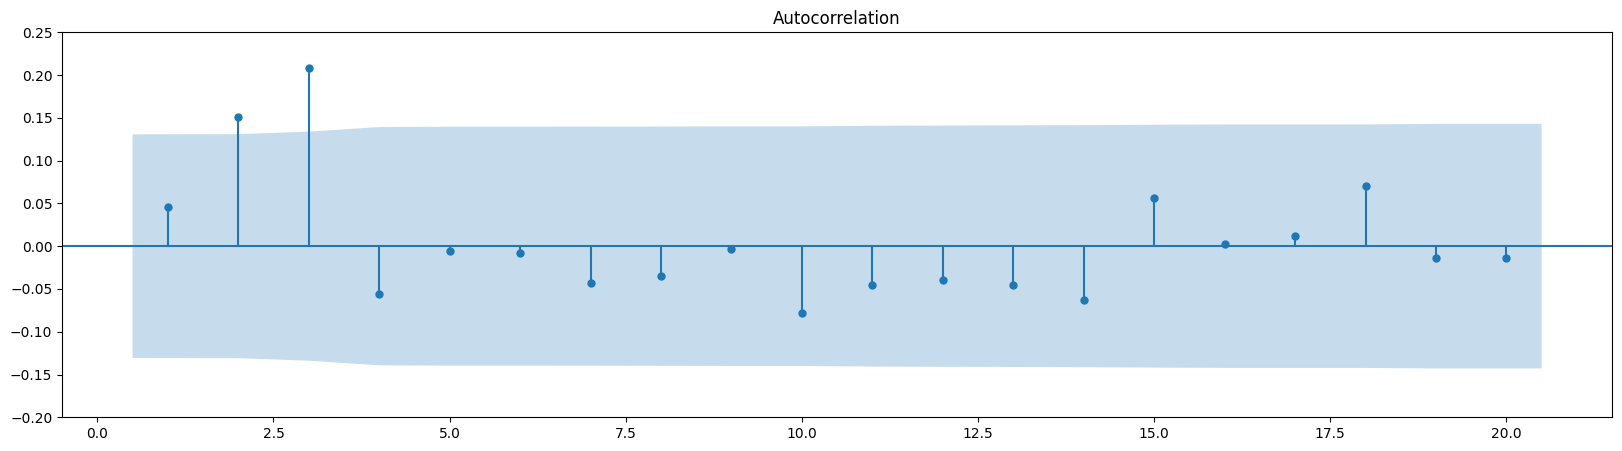

In [62]:
fig,ax=plt.subplots(figsize=(20,5))
sgt.plot_acf(result1.resid**2,lags=20,zero=False,ax=ax)
plt.ylim(top=0.25,bottom=-0.2)
plt.show()

In [74]:
for i in range(1,4):
    for j in range(1,4):
        garch=arch_model(result1.resid,vol='GARCH',p=i,q=j)
        garch_result=garch.fit(disp=False)
        print(f'AIC of GARCH({i},{j}): ',garch_result.aic)

AIC of GARCH(1,1):  -2217.591459231993
AIC of GARCH(1,2):  -2213.648531748711
AIC of GARCH(1,3):  -2208.6235860480638
AIC of GARCH(2,1):  -2218.302018678073
AIC of GARCH(2,2):  -2214.98670865332
AIC of GARCH(2,3):  -2211.435630383051
AIC of GARCH(3,1):  -2217.480287606597
AIC of GARCH(3,2):  -2214.9250997808767
AIC of GARCH(3,3):  -2212.472779962078


## *Check between GARCH(1,1) & GARCH(2,1)*

In [81]:
garch_1_1=arch_model(result1.resid,vol='GARCH',p=1,q=1)
garch_1_1_result=garch_1_1.fit(disp=False)
garch_1_1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1112.80
Distribution:                  Normal   AIC:                          -2217.59
Method:            Maximum Likelihood   BIC:                          -2203.93
                                        No. Observations:                  225
Date:                Tue, Oct 28 2025   Df Residuals:                      224
Time:                        20:56:18   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.2614e-05  2.537e-07     89.146      0.000 [2.212e-05,2.311e-05]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.3569e-07  8.816e-11  1.061e+04      0.000 [9.355e-07,9.359e-07]
alpha[1]       0.1000  7.839e-02      1.276      0.202  [-5.364e-02,  0.254]
beta[1]        0.6000  7.165e-02      8.374  5.582e-17     [  0.460,  0.740]
============================================================================

Covariance estimator: robust
"""

In [82]:
garch_2_1=arch_model(result1.resid,vol='GARCH',p=2,q=1)
garch_2_1_result=garch_2_1.fit(disp=False)
garch_2_1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1114.15
Distribution:                  Normal   AIC:                          -2218.30
Method:            Maximum Likelihood   BIC:                          -2201.22
                                        No. Observations:                  225
Date:                Tue, Oct 28 2025   Df Residuals:                      224
Time:                        20:56:27   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.5430e-05  1.873e-07    135.792      0.000 [2.506e-05,2.580e-05]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.5595e-06  8.202e-11  1.901e+04      0.000 [1.559e-06,1.560e-06]
alpha[1]       0.1000  8.428e-02      1.187      0.235  [-6.518e-02,  0.265]
alpha[2]       0.1000      0.124      0.808      0.419     [ -0.143,  0.343]
beta[1]        0.3000      0.117      2.558  1.052e-02   [7.016e-02,  0.530]
============================================================================

Covariance estimator: robust
"""

**alpha[2] not significant so final model: GARCH(1,1)** <br>
**Check residuals for resemblance to white noise**

In [86]:
print(f'Mean and variance of residuals are {garch_2_1_result.std_resid.mean()} and {garch_2_1_result.std_resid.var()} respectively')

Mean and variance of residuals are -0.013349703464772508 and 0.9933540182755485 respectively


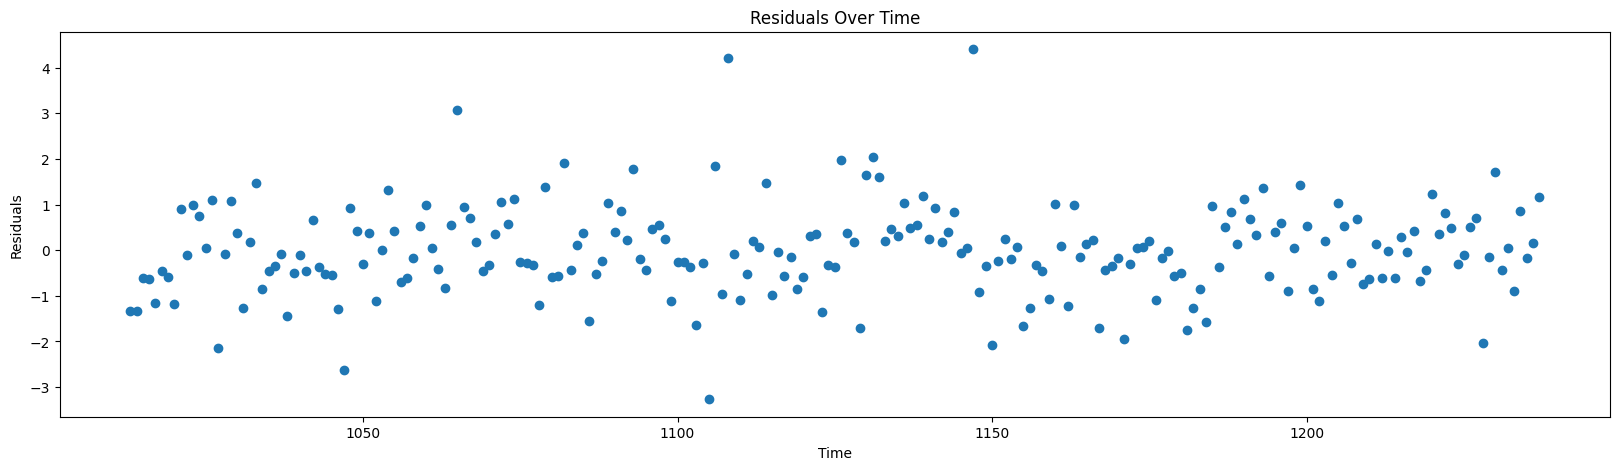

In [90]:
plt.figure(figsize=(20,5))
plt.scatter(garch_1_1_result.std_resid.index,garch_1_1_result.std_resid)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

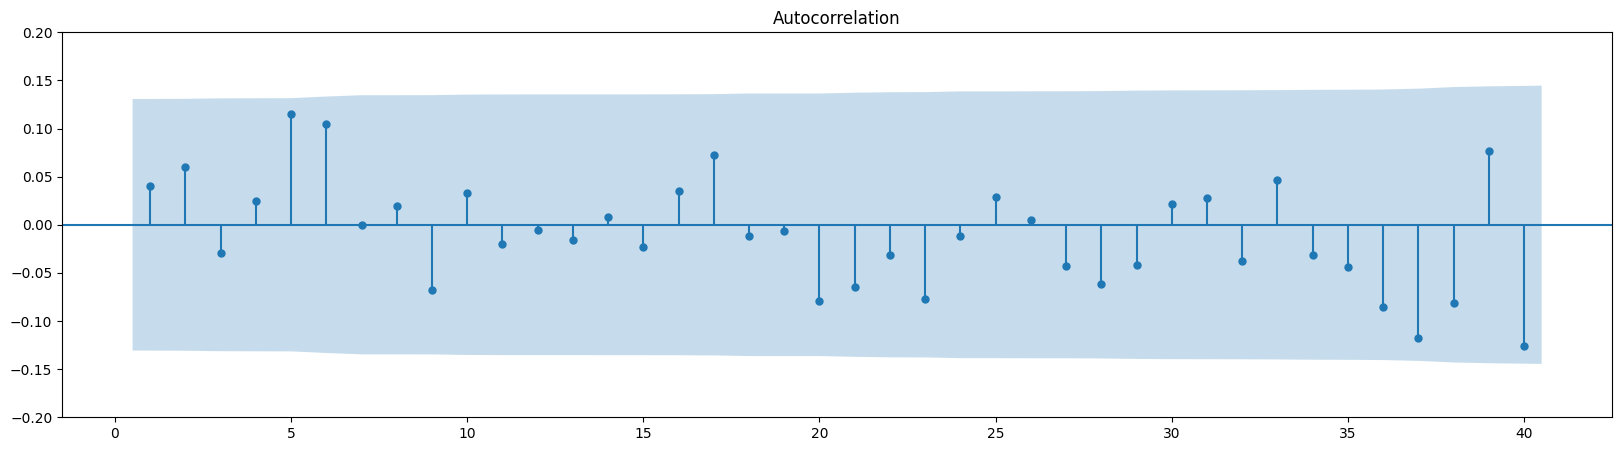

In [92]:
fig,ax=plt.subplots(figsize=(20,5))
sgt.plot_acf(garch_1_1_result.std_resid,lags=40,zero=False,ax=ax)
plt.ylim(top=0.2,bottom=-0.2)
plt.show()

## Step 3: Forecasting

## *Multi-Step Forecast*

In [100]:
armax_test=result1.predict(period=len(X_test),exog=X_test)
resid_test=y_test-armax_test

In [129]:
garch_test=garch_1_1_result.forecast(horizon=len(resid_test),reindex=False)
var_test=garch_test.variance.values[-1,:]
vol_test=np.sqrt(var_test)

In [130]:
vol_test=pd.Series(vol_test,index=y_test.index)

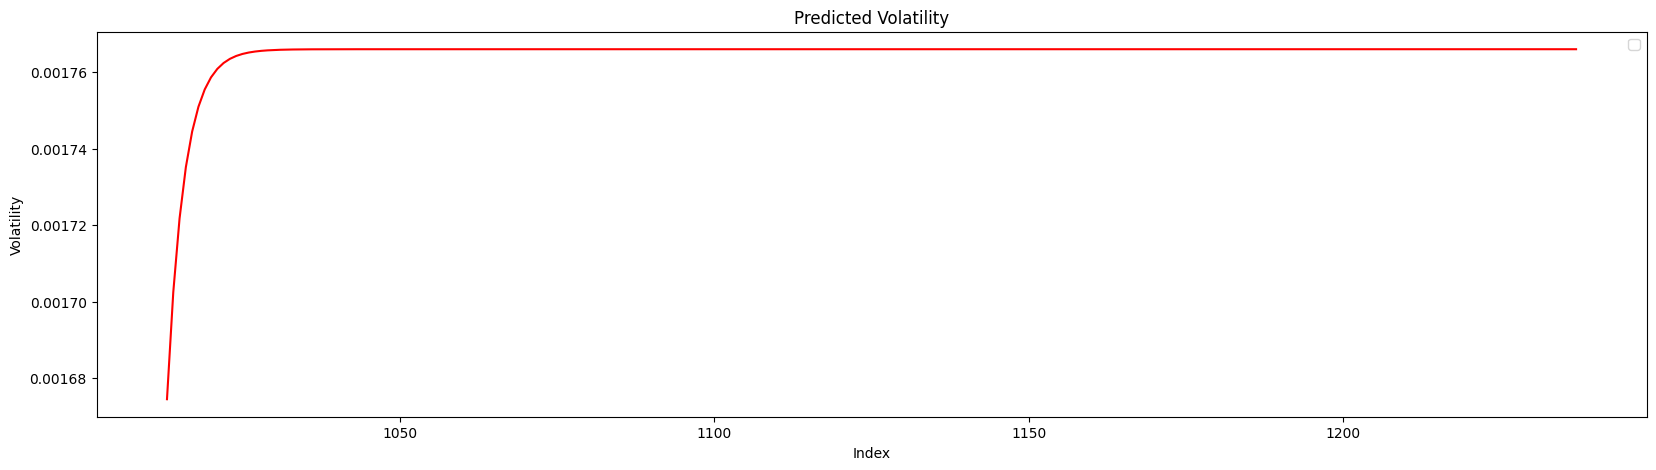

In [166]:
plt.figure(figsize=(20,5))
plt.plot(vol_test.index, vol_test,color='r')
plt.title('Predicted Volatility')
plt.xlabel('Index')
plt.ylabel('Volatility')
plt.legend()
plt.show()

**GARCH isn’t designed to give multi-step volatility beyond a short horizon (converges fast)**

## *Rolling 1 Step Forecast*

In [ ]:
rolling_vol = []
for i in range(len(y_test)):
    resid_total=np.concatenate([result1.resid, resid_test[:i]]) 
    garch_roll=arch_model(resid_total, vol='GARCH', p=1, q=1).fit(disp='off')
    forecast_roll=garch_roll.forecast(horizon=1,reindex=False)
    rolling_vol.append(np.sqrt(forecast_roll.variance.values[-1, 0]))

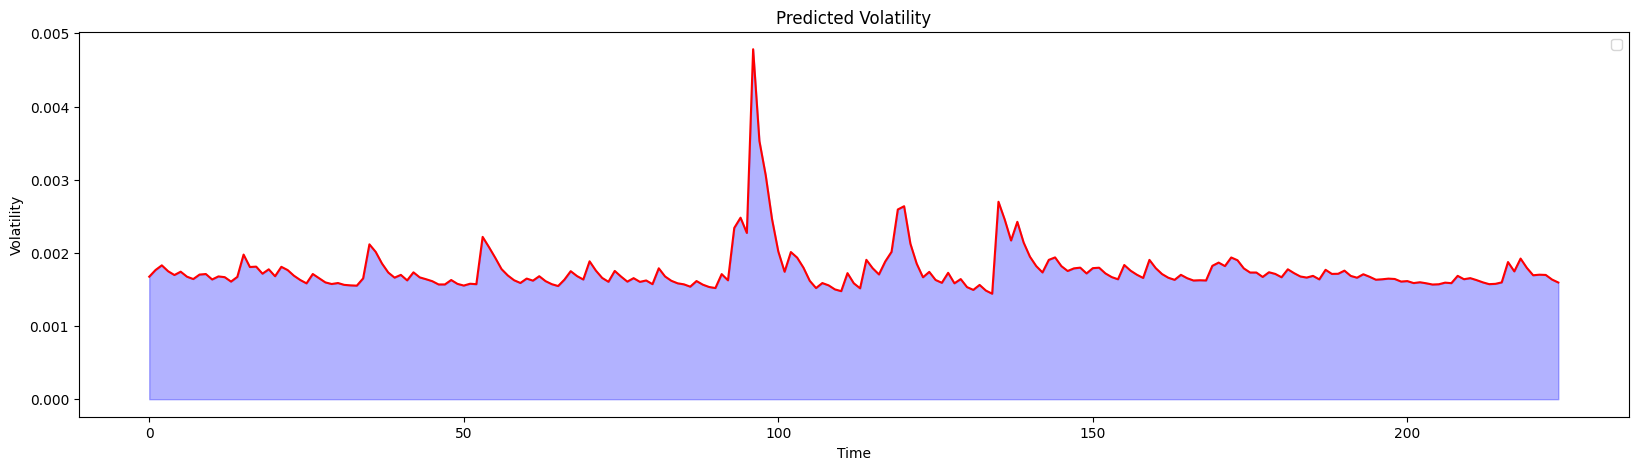

In [167]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(rolling_vol)), rolling_vol, color='r')
plt.fill_between(np.arange(len(rolling_vol)), rolling_vol, color='blue', alpha=0.3)
plt.title('Predicted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()